In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import plot_model

X data: (150, 2)
Y data: (150, 2)
L data: (150,)


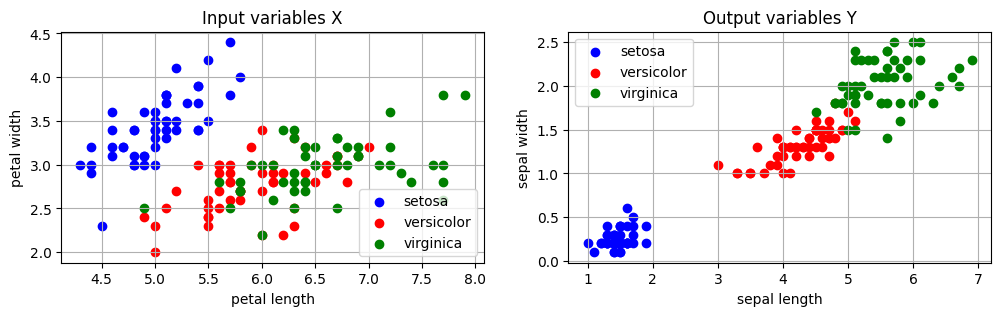

In [ ]:
# Load and split data
iris = load_iris()

# We will use length and width of petals as X to predict length and width of sepals as Y
# We also keep the labels in a vector L, only for visualzation purposes
X = iris.data[:, :2]
Y = iris.data[:, 2:]
L = iris.target

print("X data:", X.shape)
print("Y data:", Y.shape)
print("L data:", L.shape)

# Plot it
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label='setosa')
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label='versicolor')
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Input variables X')
plt.subplot(1, 2, 2)
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label='setosa')
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label='versicolor')
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Output variables Y')
plt.show()

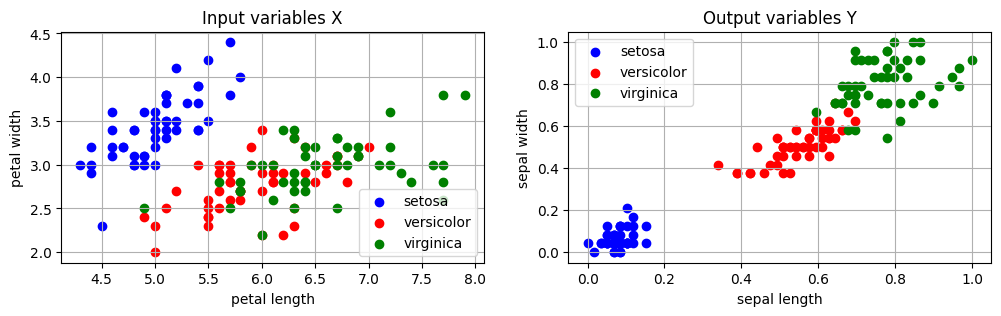

In [ ]:
# prompt: scale a dataset to be between 0 and 1
Y = MinMaxScaler().fit_transform(Y)

# Plot it
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label='setosa')
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label='versicolor')
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Input variables X')
plt.subplot(1, 2, 2)
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label='setosa')
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label='versicolor')
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Output variables Y')
plt.show()

In [ ]:
# Create an MLP of two inputs x=[x1, x2], and two outputs y=[y1, y2]
# OK-ish
#i = Input(shape=(2), name='input')
#h = Dense(units=32, activation='swish')(i)
#h = Dense(units=16, activation='swish')(h)
#h = Dense(units=8, activation='swish')(h)
#o = Dense(units=2, activation='sigmoid', name='output')(h)

i = Input(shape=(2), name='input')
h = Dense(units=32, activation='swish')(i)
h = Dense(units=16, activation='swish')(h)
h = Dense(units=8, activation='swish')(h)
o = Dense(units=2, activation='sigmoid', name='output')(h)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 dense_37 (Dense)            (None, 32)                96        
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 8)                 136       
                                                                 
 output (Dense)              (None, 2)                 18        
                                                                 
Total params: 778 (3.04 KB)
Trainable params: 778 (3.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


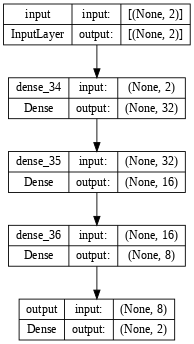

In [ ]:
# Plot a diagram of the MLP model
plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [ ]:
# Here we define the optimizer and loss function
MLP.compile(optimizer='adam', loss='mse')
history = MLP.fit(X, Y, batch_size=2, epochs=500)

Epoch 1/500
75/75 [==============================] - 1s 2ms/step - loss: 0.0943
Epoch 2/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0752
Epoch 3/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 4/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 5/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 6/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 7/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 8/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0207
Epoch 9/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 10/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 11/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 12/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 13/500
75/75 [=================

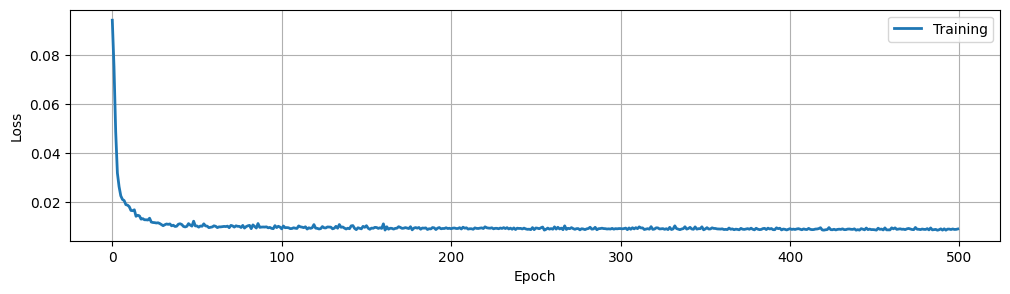

In [ ]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 3))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
# Now generate the predictions on the test set
Y_hat = MLP.predict(X)
print(Y_hat.shape)

5/5 [==============================] - 0s 4ms/step
(150, 2)


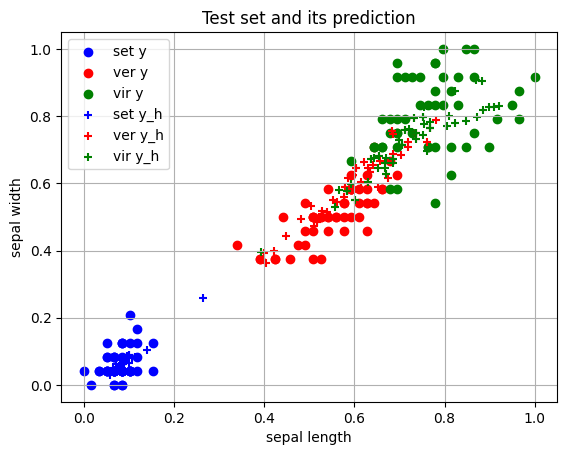

In [ ]:
 # Plot y_test_hat
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label='set y')
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label='ver y')
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label='vir y')

plt.scatter(Y_hat[L==0, 0], Y_hat[L==0, 1], c='b', marker='+', label='set y_h')
plt.scatter(Y_hat[L==1, 0], Y_hat[L==1, 1], c='r', marker='+', label='ver y_h')
plt.scatter(Y_hat[L==2, 0], Y_hat[L==2, 1], c='g', marker='+', label='vir y_h')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()

In [ ]:
# Create a partial model from MLP input to output of first layer
m1 = Model(MLP.inputs, MLP.layers[1].output)
m1.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 dense_37 (Dense)            (None, 32)                96        
                                                                 
Total params: 96 (384.00 Byte)
Trainable params: 96 (384.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Create partial models for other layers
m2 = Model(MLP.inputs, MLP.layers[2].output)
m3 = Model(MLP.inputs, MLP.layers[3].output)

In [ ]:
# Use partial models to predict hiden outputs
h1 = m1.predict(X)
h2 = m2.predict(X)
h3 = m3.predict(X)

5/5 [==============================] - 0s 2ms/step


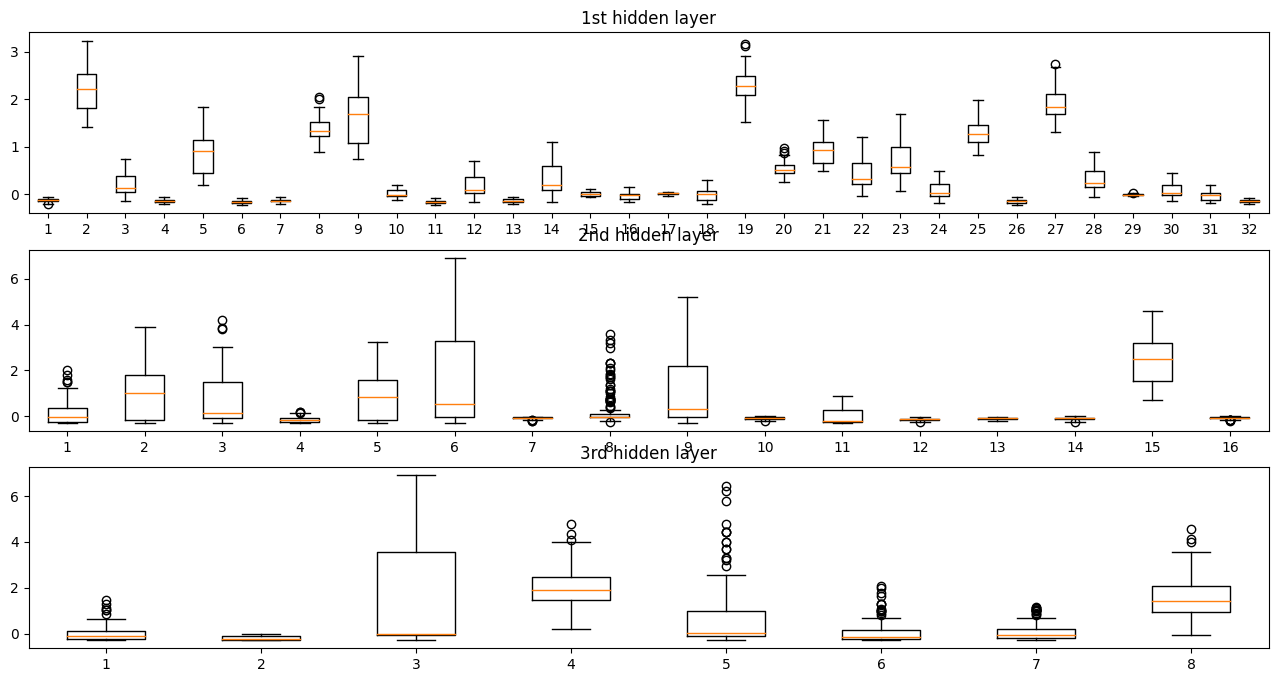

In [ ]:
# See distributions as boxplots
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plt.title('1st hidden layer')
plt.boxplot(h1)
plt.subplot(3, 1, 2)
plt.title('2nd hidden layer')
plt.boxplot(h2)
plt.subplot(3, 1, 3)
plt.title('3rd hidden layer')
plt.boxplot(h3)
plt.show()

In [ ]:
# Project into 2D for visualization
h1 = PCA(n_components=2).fit_transform(h1)
h2 = PCA(n_components=2).fit_transform(h2)
h3 = PCA(n_components=2).fit_transform(h3)

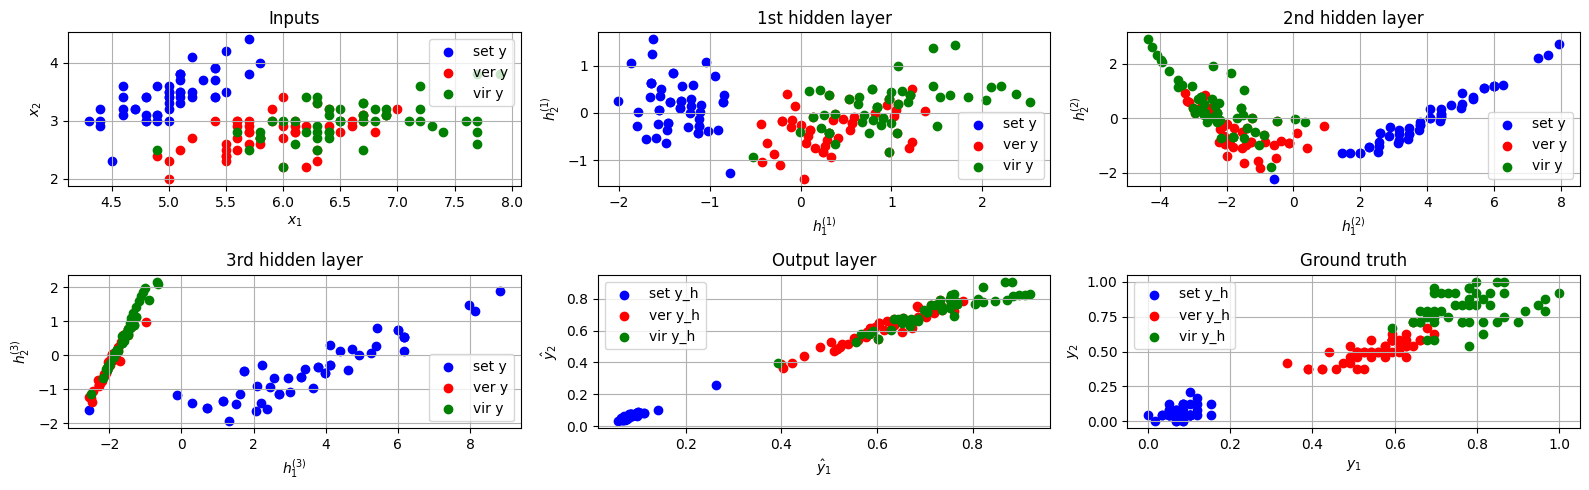

In [ ]:
# Plot hiden outputs
plt.figure(figsize=(16, 5))
plt.subplot(2, 3, 1)
plt.title('Inputs')
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label='set y')
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label='ver y')
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label='vir y')
plt.legend()
plt.grid(True)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.subplot(2, 3, 2)
plt.title('1st hidden layer')
plt.scatter(h1[L==0, 0], h1[L==0, 1], c='b', label='set y')
plt.scatter(h1[L==1, 0], h1[L==1, 1], c='r', label='ver y')
plt.scatter(h1[L==2, 0], h1[L==2, 1], c='g', label='vir y')
plt.legend()
plt.grid(True)
plt.xlabel(r'$h^{(1)}_1$')
plt.ylabel(r'$h^{(1)}_2$')
plt.subplot(2, 3, 3)
plt.title('2nd hidden layer')
plt.scatter(h2[L==0, 0], h2[L==0, 1], c='b', label='set y')
plt.scatter(h2[L==1, 0], h2[L==1, 1], c='r', label='ver y')
plt.scatter(h2[L==2, 0], h2[L==2, 1], c='g', label='vir y')
plt.legend()
plt.grid(True)
plt.xlabel(r'$h^{(2)}_1$')
plt.ylabel(r'$h^{(2)}_2$')
plt.subplot(2, 3, 4)
plt.title('3rd hidden layer')
plt.scatter(h3[L==0, 0], h3[L==0, 1], c='b', label='set y')
plt.scatter(h3[L==1, 0], h3[L==1, 1], c='r', label='ver y')
plt.scatter(h3[L==2, 0], h3[L==2, 1], c='g', label='vir y')
plt.legend()
plt.grid(True)
plt.xlabel(r'$h^{(3)}_1$')
plt.ylabel(r'$h^{(3)}_2$')
plt.subplot(2, 3, 5)
plt.title('Output layer')
plt.scatter(Y_hat[L==0, 0], Y_hat[L==0, 1], c='b', label='set y_h')
plt.scatter(Y_hat[L==1, 0], Y_hat[L==1, 1], c='r', label='ver y_h')
plt.scatter(Y_hat[L==2, 0], Y_hat[L==2, 1], c='g', label='vir y_h')
plt.legend()
plt.grid(True)
plt.xlabel(r'$\hat{y}_1$')
plt.ylabel(r'$\hat{y}_2$')
plt.subplot(2, 3, 6)
plt.title('Ground truth')
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label='set y_h')
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label='ver y_h')
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label='vir y_h')
plt.legend()
plt.grid(True)
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')
plt.tight_layout()
plt.show()